In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Hide TensorFlow warnings

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [12]:
# Load trained rice model
model = load_model('/kaggle/input/grain-palatte/rice_model.h5')
print("Model loaded successfully.")


Model loaded successfully.


In [13]:
# Load rice class labels
with open('/kaggle/input/grain-palatte/rice_labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]
print("Labels:", labels)


Labels: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [14]:
# Load and preprocess test image
img_path ='/kaggle/input/grain-palatte/grain 3.webp'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


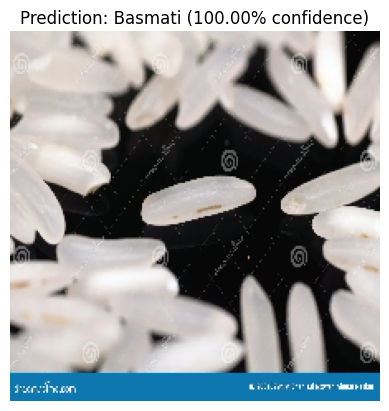

In [15]:
# Predict rice type
prediction = model.predict(img_array)[0]
predicted_label = labels[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Show prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}% confidence)")
plt.show()
